# **GROUP 31:**

## **Email ID:**


*  Abhay Rajde - abrajde@iu.edu
*  Govind Babhulgaonkar - gobabh@iu.edu
*  Harshit Shiroiya - hshiroiy@iu.edu
*  Satin Jain - satjain@iu.edu 
 



##  **Team and Project Meta Information**

The course project is based on the [Home Credit Default Risk (HCDR)  Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk/). The goal of this project is to predict whether or not a client will repay a loan. In order to make sure that people who struggle to get loans due to insufficient or non-existent credit histories have a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.


## Some of the challenges

1. Dataset size 
   * (688 meg uncompressed) with millions of rows of data
   * 2.71 Gig of data uncompressed
* Dealing with missing data
* Imbalanced datasets
* Summarizing transaction data


# Kaggle API setup
Kaggle is a Data Science Competition Platform which shares a lot of datasets. In the past, it was troublesome to submit your result as your have to go through the console in your browser and drag your files there. Now you can interact with Kaggle via the command line. E.g., 

```bash
! kaggle competitions files home-credit-default-risk
```

It is quite easy to setup, it takes me less than 15 minutes to finish a submission.

1. Install library
* Create a API Token (edit your profile on [Kaggle.com](https://www.kaggle.com/)); this produces `kaggle.json` file
* Put your JSON `kaggle.json` in the right place
* Access competition files; make submissions via the command (see examples below)
* Submit result

For more detailed information on setting the Kaggle API see [here](https://medium.com/@nokkk/make-your-kaggle-submissions-with-kaggle-official-api-f49093c04f8a) and [here](https://github.com/Kaggle/kaggle-api).



In [ ]:
!pip install kaggle

     |████████████████████████████████| 58 kB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 11.8 MB/s eta 0:00:01
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73053 sha256=87e5c30ea649cce4567e467facc6d2ae061b33791805b3aaa9d167e52ae11058
  Stored in directory: /Users/harshitshiroiya/Library/Caches/pip/wheels/29/da/11/144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle


In [ ]:
!pwd


/content


In [ ]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [132]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! kaggle competitions files home-credit-default-risk

name                                 size  creationDate         
----------------------------------  -----  -------------------  
previous_application.csv            386MB  2019-12-11 02:55:35  
application_train.csv               158MB  2019-12-11 02:55:35  
sample_submission.csv               524KB  2019-12-11 02:55:35  
bureau.csv                          162MB  2019-12-11 02:55:35  
application_test.csv                 25MB  2019-12-11 02:55:35  
POS_CASH_balance.csv                375MB  2019-12-11 02:55:35  
installments_payments.csv           690MB  2019-12-11 02:55:35  
bureau_balance.csv                  358MB  2019-12-11 02:55:35  
credit_card_balance.csv             405MB  2019-12-11 02:55:35  
HomeCredit_columns_description.csv   37KB  2019-12-11 02:55:35  


# Dataset and how to download


## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

## Data files overview
There are 7 different sources of data:

* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [ ]:
# ![alt](home_credit.png "Home credit")

![image.png](attachment:image.png)

## Downloading the files via Kaggle API

Create a base directory:

```bash
DATA_DIR = "../../../Data/home-credit-default-risk"   #same level as course repo in the data directory
```

Please download the project data files and data dictionary and unzip them using either of the following approaches:

1. Click on the `Download` button on the following [Data Webpage](https://www.kaggle.com/c/home-credit-default-risk/data) and unzip the  zip file to the `BASE_DIR`
2. If you plan to use the Kaggle API, please use the following steps.


In [ ]:
DATA_DIR = "/content/drive/MyDrive/home-credit-default-risk"   #same level as course repo in the data directory
#DATA_DIR = os.path.join('./ddddd/')
!mkdir $DATA_DIR

mkdir: cannot create directory ‘/content/drive/MyDrive/home-credit-default-risk’: File exists


In [ ]:
!ls -l $DATA_DIR

total 704704
-rw------- 1 root root 721616255 Apr 16 21:22 home-credit-default-risk.zip


In [ ]:
! kaggle competitions download home-credit-default-risk -p $DATA_DIR

 99% 683M/688M [00:12<00:00, 54.5MB/s]
100% 688M/688M [00:12<00:00, 57.6MB/s]


### Imports

In [2]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [3]:
DATA_DIR = "/content/drive/MyDrive/home-credit-default-risk" 
print(DATA_DIR)

/content/drive/MyDrive/home-credit-default-risk


In [ ]:
unzippingReq = False
if unzippingReq: #please modify this code 
    zip_ref = zipfile.ZipFile(DATA_DIR+'/home-credit-default-risk.zip', 'r')
    zip_ref.extractall(DATA_DIR)
    zip_ref.close()

In [ ]:
unzippingReq = False
if unzippingReq: #please modify this code 
    zip_ref = zipfile.ZipFile('application_train.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('application_test.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('bureau_balance.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('bureau.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('credit_card_balance.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('installments_payments.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('POS_CASH_balance.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('previous_application.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()

## Data files overview
### Data Dictionary

As part of the data download comes a  Data Dictionary. It named `HomeCredit_columns_description.csv`

![image.png](attachment:image.png)

### Application train

In [4]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily
ds_name = 'application_train'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

datasets['application_train'].shape

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


(307511, 122)

### Application test


* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.


In [5]:
ds_name = 'application_test'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


The application dataset has the most information about the client: Gender, income, family status, education ...

### The Other datasets

* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [6]:
%%time
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)


application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


CPU times: user 43.9 s, sys: 10.9 s, total: 54.9 s
Wall time: 1min 2s


# Exploratory Data Analysis

##  Dataset Size

In [ ]:
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')

dataset application_train       : [    307,511, 122]
dataset application_test        : [     48,744, 121]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


## Plotting Missing values Function

In [ ]:
def plot_missing_data(df, x, y):
    g = sns.displot(
        data=datasets[df].isna().melt(value_name="missing"),
        y="variable",
        hue="missing",
        multiple="fill",
        aspect=1.25
    )
    g.fig.set_figwidth(x)
    g.fig.set_figheight(y)


## Summary of Application train

In [ ]:
datasets["application_train"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
datasets["application_train"].describe() #numerical only features

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [ ]:
datasets["application_train"].describe(include='all') #numerical only features

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


### Missing data for application train

In [ ]:
percent = (datasets["application_train"].isnull().sum()/datasets["application_train"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_train"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

,Percent,Train Missing Count
COMMONAREA_MEDI,69.87,214865
COMMONAREA_AVG,69.87,214865
COMMONAREA_MODE,69.87,214865
NONLIVINGAPARTMENTS_MODE,69.43,213514
NONLIVINGAPARTMENTS_AVG,69.43,213514
NONLIVINGAPARTMENTS_MEDI,69.43,213514
FONDKAPREMONT_MODE,68.39,210295
LIVINGAPARTMENTS_MODE,68.35,210199
LIVINGAPARTMENTS_AVG,68.35,210199
LIVINGAPARTMENTS_MEDI,68.35,210199


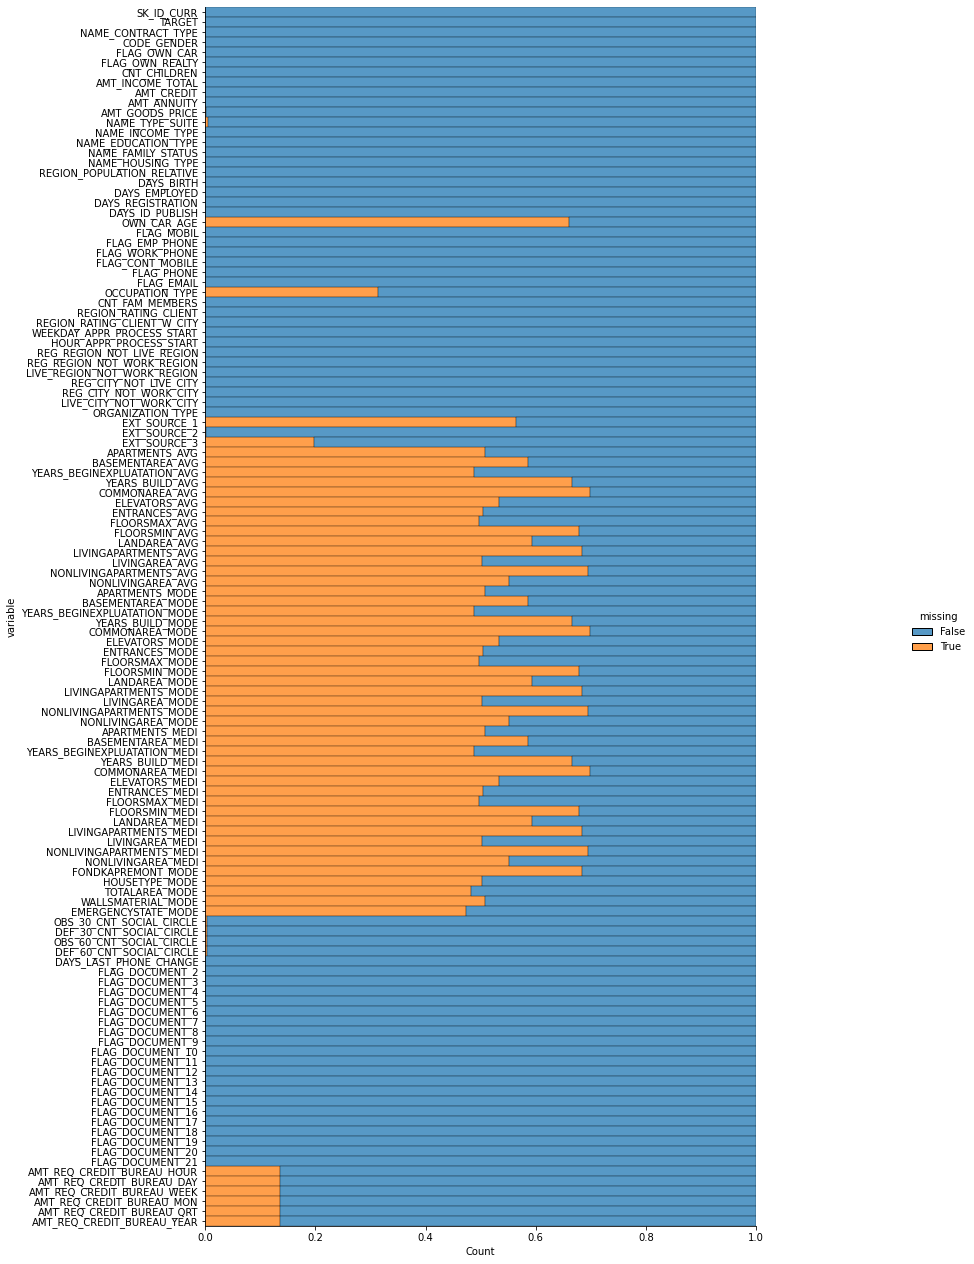

In [ ]:
plot_missing_data("application_train",18,20)  

![WhatsApp%20Image%202022-04-12%20at%2011.30.07%20PM.jpeg](attachment:WhatsApp%20Image%202022-04-12%20at%2011.30.07%20PM.jpeg)

## Summary of Application Test

In [ ]:
datasets["application_test"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [ ]:
datasets["application_test"].describe() #numerical only features

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [ ]:
datasets["application_test"].describe(include='all') #look at all categorical and numerical

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744,48744,48744,48744,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
unique,NaN,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,48305,32678,32311,33658,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,277796.676350,NaN,NaN,NaN,NaN,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,NaN,NaN,NaN,NaN,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,NaN,NaN,NaN,NaN,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,NaN,NaN,NaN,NaN,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,NaN,NaN,NaN,NaN,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000


### Missing data for application Test

In [ ]:
percent = (datasets["application_test"].isnull().sum()/datasets["application_test"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_test"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_train_data.head(20)

,Percent,Test Missing Count
COMMONAREA_AVG,68.72,33495
COMMONAREA_MODE,68.72,33495
COMMONAREA_MEDI,68.72,33495
NONLIVINGAPARTMENTS_AVG,68.41,33347
NONLIVINGAPARTMENTS_MODE,68.41,33347
NONLIVINGAPARTMENTS_MEDI,68.41,33347
FONDKAPREMONT_MODE,67.28,32797
LIVINGAPARTMENTS_AVG,67.25,32780
LIVINGAPARTMENTS_MODE,67.25,32780
LIVINGAPARTMENTS_MEDI,67.25,32780


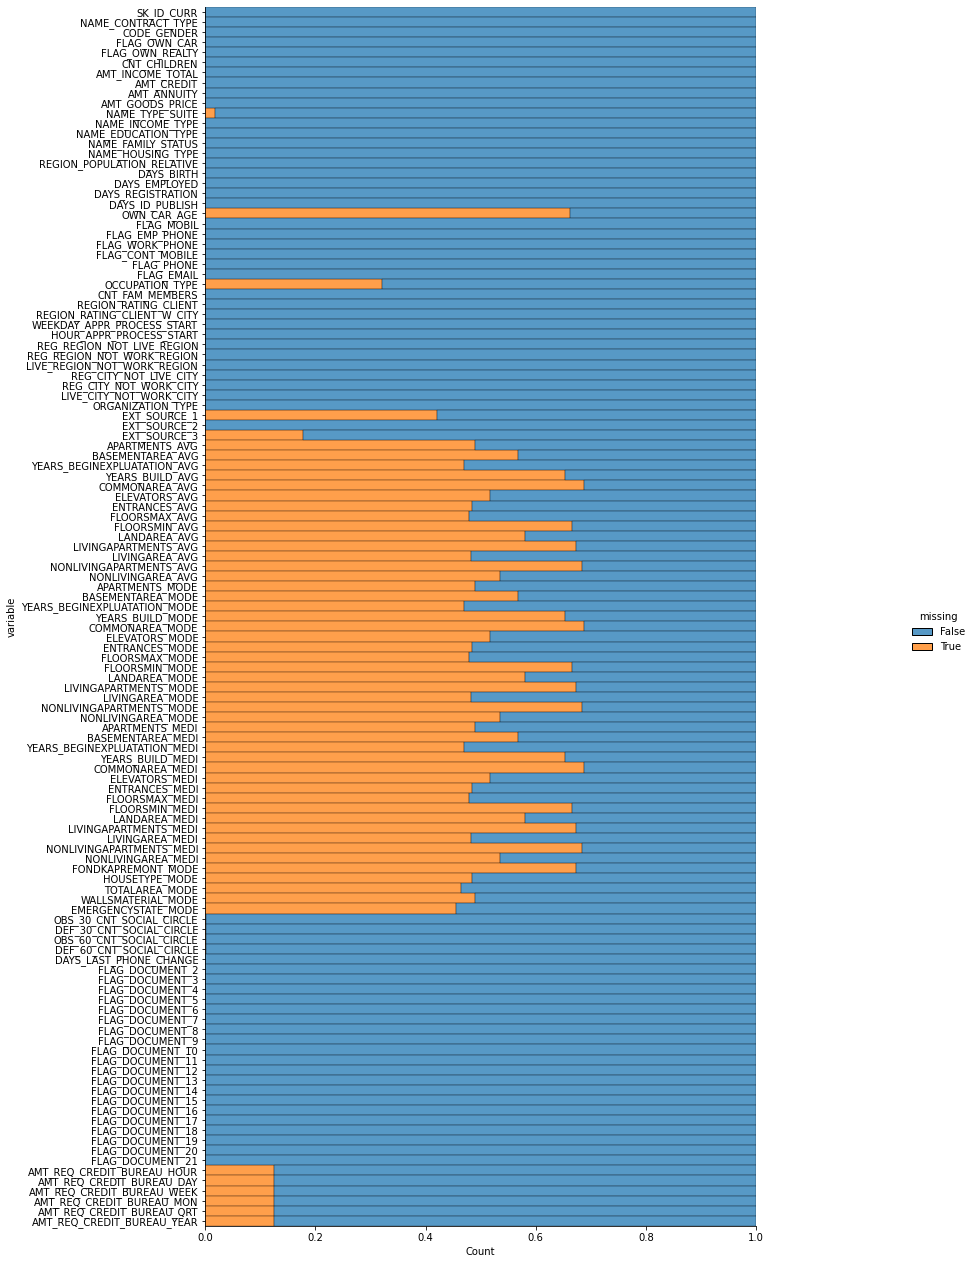

In [ ]:
plot_missing_data("application_test",18,20)  

![WhatsApp%20Image%202022-04-12%20at%2011.30.21%20PM.jpeg](attachment:WhatsApp%20Image%202022-04-12%20at%2011.30.21%20PM.jpeg)

## Summary of Bureau Balance

In [ ]:
datasets["bureau_balance"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [ ]:
datasets["bureau_balance"].describe()

,SK_ID_BUREAU,MONTHS_BALANCE
count,2.729992e+07,2.729992e+07
mean,6.036297e+06,-3.074169e+01
std,4.923489e+05,2.386451e+01
min,5.001709e+06,-9.600000e+01
25%,5.730933e+06,-4.600000e+01
50%,6.070821e+06,-2.500000e+01
75%,6.431951e+06,-1.100000e+01
max,6.842888e+06,0.000000e+00


In [ ]:
datasets["bureau_balance"].describe(include='all')

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
count,2.729992e+07,2.729992e+07,27299925
unique,NaN,NaN,8
top,NaN,NaN,C
freq,NaN,NaN,13646993
mean,6.036297e+06,-3.074169e+01,NaN
std,4.923489e+05,2.386451e+01,NaN
min,5.001709e+06,-9.600000e+01,NaN
25%,5.730933e+06,-4.600000e+01,NaN
50%,6.070821e+06,-2.500000e+01,NaN
75%,6.431951e+06,-1.100000e+01,NaN


### Missing data for Beaurau Balance

In [ ]:
percent = (datasets["bureau_balance"].isnull().sum()/datasets["bureau_balance"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["bureau_balance"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_train_data.head(20)

,Percent,Test Missing Count
SK_ID_BUREAU,0.0,0
MONTHS_BALANCE,0.0,0
STATUS,0.0,0


In [ ]:
plot_missing_data("bureau_balance",18,20)  #GB : DO NOT RUN

## Summary of Bureau 

In [ ]:
datasets["bureau"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [ ]:
datasets["bureau"].describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


In [ ]:
datasets["bureau"].describe(include='all')

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1716428,1716428,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1716428,1.716428e+06,4.896370e+05
unique,NaN,NaN,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,NaN,NaN
top,NaN,NaN,Closed,currency 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Consumer credit,NaN,NaN
freq,NaN,NaN,1079273,1715020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1251615,NaN,NaN
mean,2.782149e+05,5.924434e+06,NaN,NaN,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,NaN,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,NaN,NaN,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,NaN,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,NaN,NaN,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,NaN,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,NaN,NaN,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,NaN,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,NaN,NaN,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,NaN,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,NaN,NaN,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,NaN,-3.300000e+01,1.350000e+04


### Missing data for Beaurau 

In [ ]:
percent = (datasets["bureau"].isnull().sum()/datasets["bureau"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["bureau"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_train_data.head(20)

,Percent,Test Missing Count
AMT_ANNUITY,71.47,1226791
AMT_CREDIT_MAX_OVERDUE,65.51,1124488
DAYS_ENDDATE_FACT,36.92,633653
AMT_CREDIT_SUM_LIMIT,34.48,591780
AMT_CREDIT_SUM_DEBT,15.01,257669
DAYS_CREDIT_ENDDATE,6.15,105553
AMT_CREDIT_SUM,0.00,13
CREDIT_ACTIVE,0.00,0
CREDIT_CURRENCY,0.00,0
DAYS_CREDIT,0.00,0


In [ ]:
plot_missing_data("bureau",18,20)  

## Summary of Credit Card Balance

In [ ]:
datasets["credit_card_balance"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [ ]:
datasets["credit_card_balance"].describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,...,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,...,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,...,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,...,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,...,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


In [ ]:
datasets["credit_card_balance"].describe(include='all')

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,...,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3840312,3.840312e+06,3.840312e+06
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Active,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3698436,NaN,NaN
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,...,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,NaN,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,...,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,NaN,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,NaN,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,NaN,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,...,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,NaN,0.000000e+00,0.000000e+00


### Missing data for Credit Card Balance 

In [ ]:
percent = (datasets["credit_card_balance"].isnull().sum()/datasets["credit_card_balance"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["credit_card_balance"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_train_data.head(20)

,Percent,Test Missing Count
AMT_PAYMENT_CURRENT,20.00,767988
AMT_DRAWINGS_ATM_CURRENT,19.52,749816
CNT_DRAWINGS_POS_CURRENT,19.52,749816
AMT_DRAWINGS_OTHER_CURRENT,19.52,749816
AMT_DRAWINGS_POS_CURRENT,19.52,749816
CNT_DRAWINGS_OTHER_CURRENT,19.52,749816
CNT_DRAWINGS_ATM_CURRENT,19.52,749816
CNT_INSTALMENT_MATURE_CUM,7.95,305236
AMT_INST_MIN_REGULARITY,7.95,305236
SK_ID_PREV,0.00,0


In [ ]:
plot_missing_data("credit_card_balance",18,20)  

## Summary of Installments Payments

In [ ]:
datasets["installments_payments"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [ ]:
datasets["installments_payments"].describe()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


In [ ]:
datasets["installments_payments"].describe(include='all')

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


### Missing data for Installments Payments

In [ ]:
percent = (datasets["installments_payments"].isnull().sum()/datasets["installments_payments"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["installments_payments"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_train_data.head(20)

,Percent,Test Missing Count
DAYS_ENTRY_PAYMENT,0.02,2905
AMT_PAYMENT,0.02,2905
SK_ID_PREV,0.00,0
SK_ID_CURR,0.00,0
NUM_INSTALMENT_VERSION,0.00,0
NUM_INSTALMENT_NUMBER,0.00,0
DAYS_INSTALMENT,0.00,0
AMT_INSTALMENT,0.00,0


In [ ]:
plot_missing_data("installments_payments",18,20)  

## Summary of POS CASH Balance

In [ ]:
datasets["POS_CASH_balance"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [ ]:
datasets["POS_CASH_balance"].describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9.975287e+06,9.975271e+06,1.000136e+07,1.000136e+07
mean,1.903217e+06,2.784039e+05,-3.501259e+01,1.708965e+01,1.048384e+01,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,1.199506e+01,1.110906e+01,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00
max,2.843499e+06,4.562550e+05,-1.000000e+00,9.200000e+01,8.500000e+01,4.231000e+03,3.595000e+03


In [ ]:
datasets["POS_CASH_balance"].describe(include='all')

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9.975287e+06,9.975271e+06,10001358,1.000136e+07,1.000136e+07
unique,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Active,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,9151119,NaN,NaN
mean,1.903217e+06,2.784039e+05,-3.501259e+01,1.708965e+01,1.048384e+01,NaN,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,1.199506e+01,1.110906e+01,NaN,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,1.000000e+01,3.000000e+00,NaN,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,1.200000e+01,7.000000e+00,NaN,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,2.400000e+01,1.400000e+01,NaN,0.000000e+00,0.000000e+00


### Missing data for POS CASH Balance

In [ ]:
percent = (datasets["POS_CASH_balance"].isnull().sum()/datasets["POS_CASH_balance"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["POS_CASH_balance"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_train_data.head(20)

,Percent,Test Missing Count
CNT_INSTALMENT_FUTURE,0.26,26087
CNT_INSTALMENT,0.26,26071
SK_ID_PREV,0.00,0
SK_ID_CURR,0.00,0
MONTHS_BALANCE,0.00,0
NAME_CONTRACT_STATUS,0.00,0
SK_DPD,0.00,0
SK_DPD_DEF,0.00,0


In [ ]:
plot_missing_data("POS_cash_balance",18,20)  

## Summary of Previous Applications 

In [ ]:
datasets["previous_application"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [ ]:
datasets["previous_application"].describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [ ]:
datasets["previous_application"].describe(include='all')

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1670214,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1670214,1.670214e+06,...,1670214,1.297984e+06,1670214,1669868,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,7,NaN,...,11,NaN,5,17,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,NaN,NaN,NaN,NaN,NaN,TUESDAY,NaN,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,747553,NaN,NaN,NaN,NaN,NaN,255118,NaN,...,855720,NaN,517215,285990,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.923089e+06,2.783572e+05,NaN,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,NaN,1.248418e+01,...,NaN,1.605408e+01,NaN,NaN,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,NaN,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,NaN,3.334028e+00,...,NaN,1.456729e+01,NaN,NaN,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,NaN,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,NaN,0.000000e+00,...,NaN,0.000000e+00,NaN,NaN,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,NaN,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,NaN,1.000000e+01,...,NaN,6.000000e+00,NaN,NaN,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,NaN,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,NaN,1.200000e+01,...,NaN,1.200000e+01,NaN,NaN,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,NaN,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,NaN,1.500000e+01,...,NaN,2.400000e+01,NaN,NaN,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000


### Missing Data for Previous Applications 


In [ ]:
percent = (datasets["previous_application"].isnull().sum()/datasets["previous_application"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["previous_application"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_train_data.head(20)

,Percent,Test Missing Count
RATE_INTEREST_PRIVILEGED,99.64,1664263
RATE_INTEREST_PRIMARY,99.64,1664263
AMT_DOWN_PAYMENT,53.64,895844
RATE_DOWN_PAYMENT,53.64,895844
NAME_TYPE_SUITE,49.12,820405
NFLAG_INSURED_ON_APPROVAL,40.30,673065
DAYS_TERMINATION,40.30,673065
DAYS_LAST_DUE,40.30,673065
DAYS_LAST_DUE_1ST_VERSION,40.30,673065
DAYS_FIRST_DUE,40.30,673065


In [ ]:
plot_missing_data("previous_application",18,20)  

## Distribution of the target column 

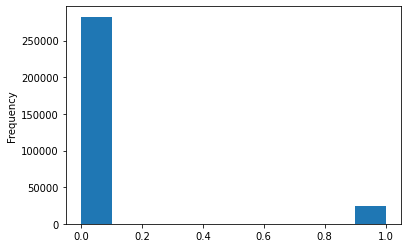

In [ ]:
datasets["application_train"]['TARGET'].astype(int).plot.hist();

## Applicants Age 

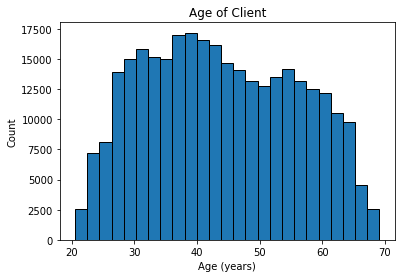

In [ ]:
plt.hist(datasets["application_train"]['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

## Applicants occupations

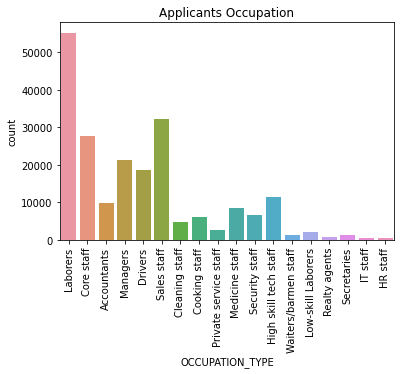

In [ ]:
sns.countplot(x='OCCUPATION_TYPE', data=datasets["application_train"]);
plt.title('Applicants Occupation');
plt.xticks(rotation=90);

# Visual EDA

## <b> Visualizing the categorical columns to understand the data more efficiently </b>


In [ ]:
def col(cat):
    plt.figure(figsize=(10,10))
    plt.title("Loan Default with respect to "+cat,fontweight='bold' , fontsize =16)
    sns.countplot(x=df[cat],hue='TARGET',data=df, palette = 'Blues')
    df = df[(df['col'] < -0.25) | (df['col'] > 0.25)]
    plt.xticks(rotation=90)


F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


Text(0.5, 1.0, 'Percentage of loan with reference to gender')

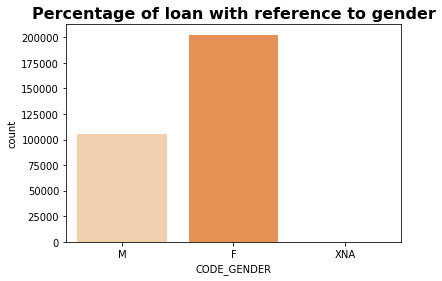

In [ ]:
print(datasets["application_train"]['CODE_GENDER'].value_counts())
sns.countplot(datasets["application_train"]['CODE_GENDER'], palette = 'Oranges')
plt.title("Percentage of loan with reference to gender", fontweight = 'bold', fontsize = 16)


The number of female borrowing the loan and who haven't paid is comparatively higher than men.

## <b> Marital status of client</b>

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64


Text(0.5, 1.0, 'Family Status vs Count')

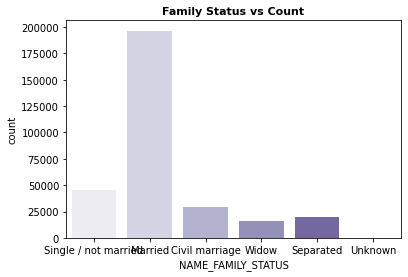

In [ ]:
print(datasets["application_train"]['NAME_FAMILY_STATUS'].value_counts())
sns.countplot(datasets["application_train"]['NAME_FAMILY_STATUS'], palette = 'Purples')
plt.title("Family Status vs Count", fontweight = 'bold', fontsize = 11)


The bulk of clients who are married have paid the smallest loan amount, while the number of clients with an uncertain status is insignificant.

## <b> Percentage of clients who owns a car </b>

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64


Text(0.5, 1.0, 'Percentage of car owners in the dataset')

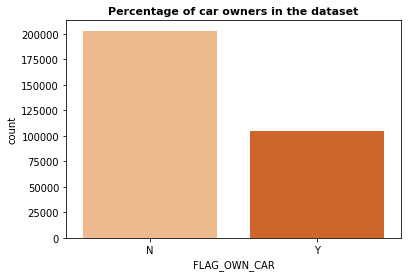

In [ ]:
print(datasets["application_train"]['FLAG_OWN_CAR'].value_counts())
sns.countplot(datasets["application_train"]['FLAG_OWN_CAR'], palette = 'Oranges')
plt.title("Percentage of car owners in the dataset", fontweight = 'bold', fontsize = 11)


About half of the population owns a car, but the majority of clients (more than half) do not, and the majority of them are likely to have defaulted on their loan.

## <b>Type of educational background the clients have:</b>

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

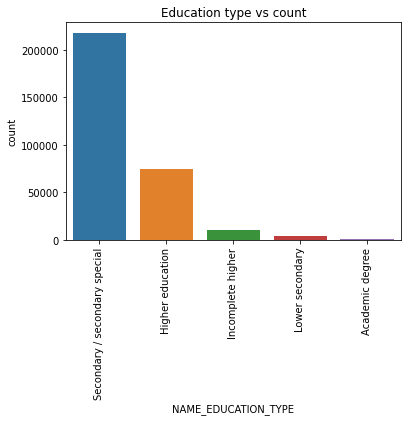

In [ ]:
print(datasets["application_train"]['NAME_EDUCATION_TYPE'].value_counts())
sns.countplot(datasets["application_train"]['NAME_EDUCATION_TYPE'])
plt.title("Education type vs count")
plt.xticks(rotation=90)





 Clients with Academic Degree are more likely to repay the loan compared to others.

## <b>The Types of house the client stays in:</b>

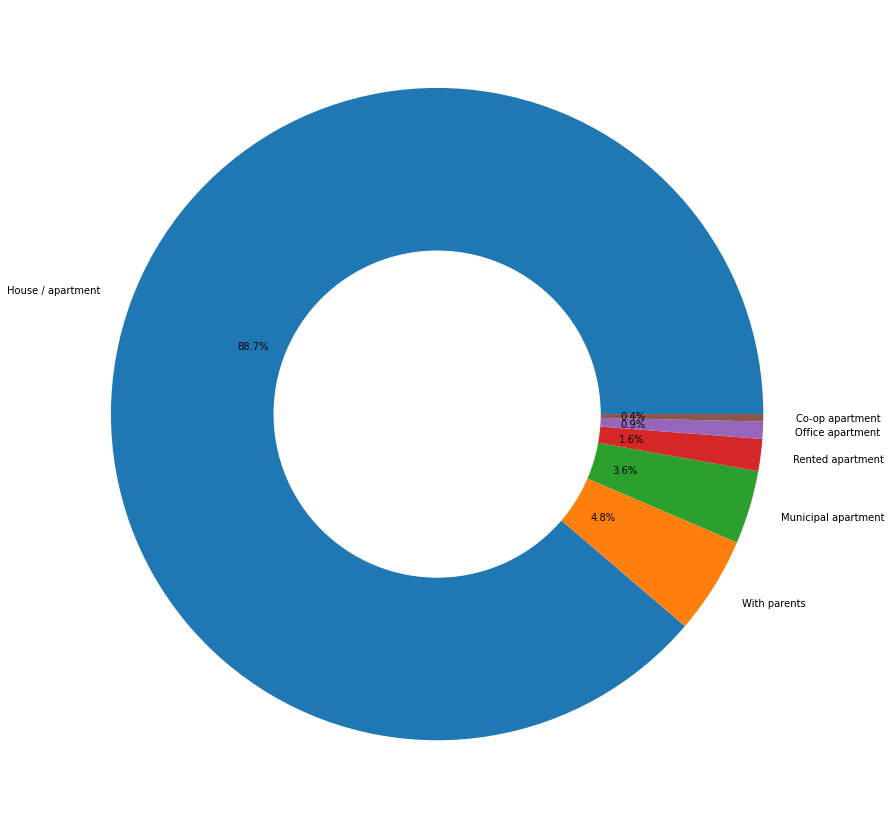

In [ ]:
plt.figure(figsize=[20,15])
plt.pie(datasets["application_train"]['NAME_HOUSING_TYPE'].value_counts(),labels = datasets["application_train"]['NAME_HOUSING_TYPE'].value_counts().index,autopct='%1.1f%%')
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()



We can see from the graph above that the bulk of the clients who live in apartments/houses have not paid their loans, while the number of clients who live in office apartments and co-op apartments is minimal.

## Types of loan available:

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64


Text(0.5, 1.0, 'Types of loan available')

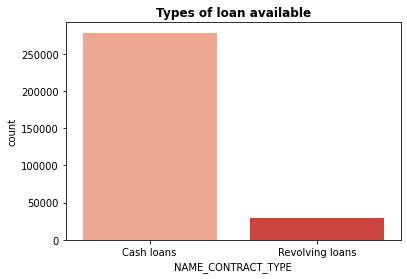

In [ ]:
print(datasets["application_train"]['NAME_CONTRACT_TYPE'].value_counts())
sns.countplot(datasets["application_train"]['NAME_CONTRACT_TYPE'], palette = 'Reds')
plt.title("Types of loan available", fontweight = 'bold', fontsize = 12)


Many people would rather take out a cash loan than a revolving loan.

## Correlation with  the target column 

In [ ]:
correlations = datasets["application_train"].corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


In [ ]:
from pandas.plotting import scatter_matrix
#We can take the top 10 features
top_corr_features = ["TARGET", "REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","DAYS_LAST_PHONE_CHANGE",
               "DAYS_BIRTH", "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3", "DAYS_ID_PUBLISH","REG_CITY_NOT_WORK_CITY"]
# scatter_matrix(datasets["application_train"][top_corr_features], figsize=(12, 8));
df = datasets["application_train"].copy()
df2 = df[top_corr_features]
corr = df2.corr()
corr.style.background_gradient(cmap='PuBu').set_precision(2)


,TARGET,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,DAYS_LAST_PHONE_CHANGE,DAYS_BIRTH,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY
TARGET,1.00,0.06,0.06,0.06,0.08,-0.16,-0.16,-0.18,0.05,0.05
REGION_RATING_CLIENT,0.06,1.00,0.95,0.03,0.01,-0.12,-0.29,-0.01,-0.01,0.01
REGION_RATING_CLIENT_W_CITY,0.06,0.95,1.00,0.03,0.01,-0.12,-0.29,-0.01,-0.01,0.03
DAYS_LAST_PHONE_CHANGE,0.06,0.03,0.03,1.00,0.08,-0.13,-0.20,-0.08,0.09,0.05
DAYS_BIRTH,0.08,0.01,0.01,0.08,1.00,-0.60,-0.09,-0.21,0.27,0.24
EXT_SOURCE_1,-0.16,-0.12,-0.12,-0.13,-0.60,1.00,0.21,0.19,-0.13,-0.19
EXT_SOURCE_2,-0.16,-0.29,-0.29,-0.20,-0.09,0.21,1.00,0.11,-0.05,-0.08
EXT_SOURCE_3,-0.18,-0.01,-0.01,-0.08,-0.21,0.19,0.11,1.00,-0.13,-0.08
DAYS_ID_PUBLISH,0.05,-0.01,-0.01,0.09,0.27,-0.13,-0.05,-0.13,1.00,0.10
REG_CITY_NOT_WORK_CITY,0.05,0.01,0.03,0.05,0.24,-0.19,-0.08,-0.08,0.10,1.00


In [ ]:
corelations = datasets["application_train"].corr()['TARGET'].sort_values()
high_corelation = corelations.tail(15)
low_corelations =  corelations.head(15)

print('most positive corelations:\n', high_corelation)
print('most negative corelations:\n', low_corelations)

most positive corelations:
 DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64
most negative corelations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REG

Text(0.5, 1.0, 'Correlation Heatmap for features with highest correlations with target variables')

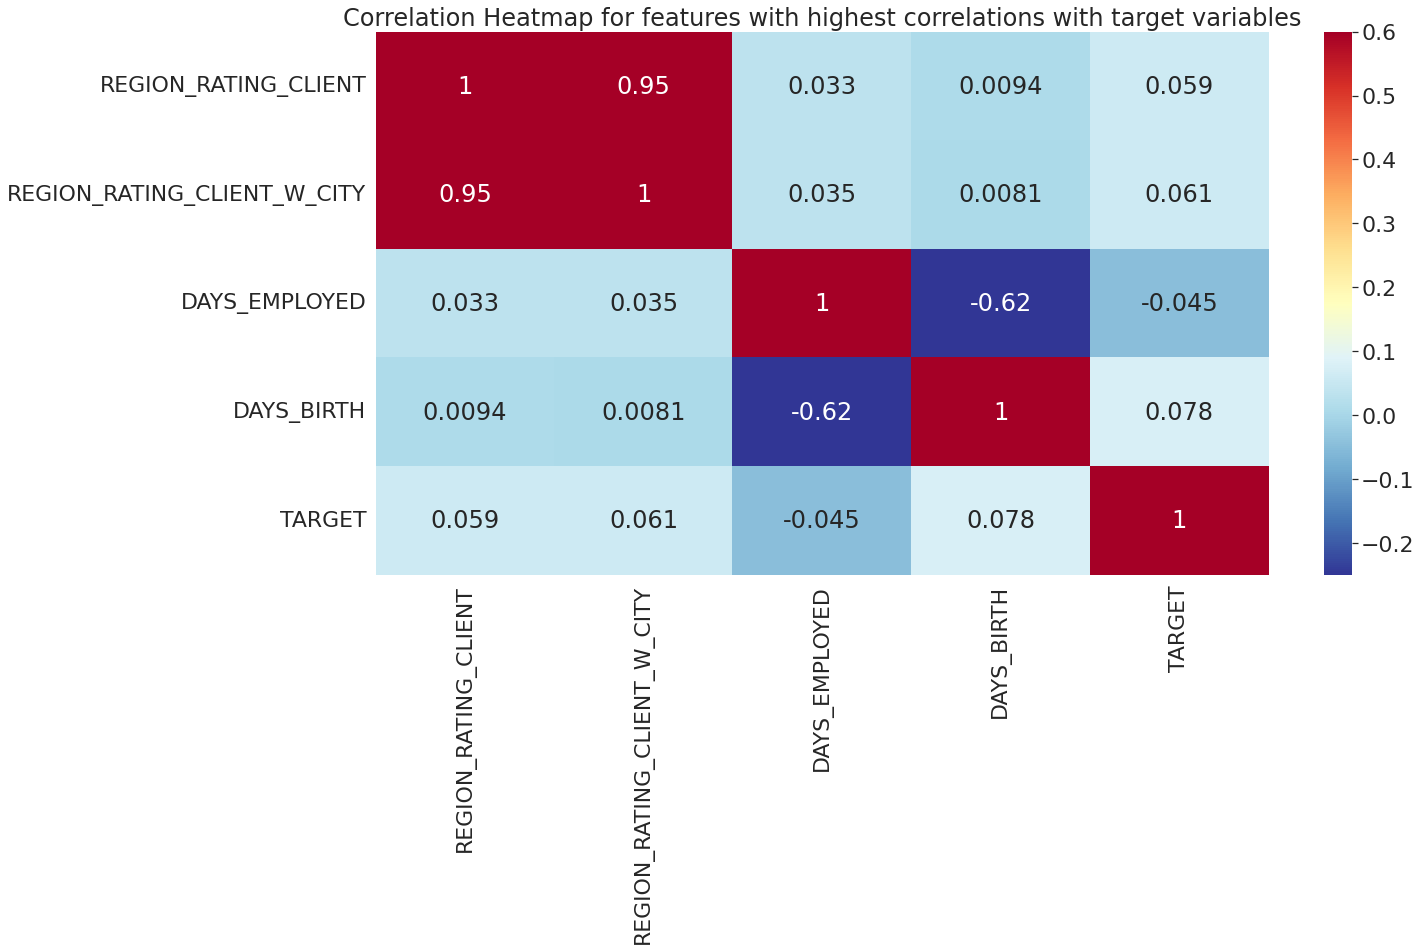

In [ ]:
most_corr=datasets["application_train"][['REGION_RATING_CLIENT',
                      'REGION_RATING_CLIENT_W_CITY','DAYS_EMPLOYED','DAYS_BIRTH','TARGET']]
most_corr_corr = most_corr.corr()

sns.set_style("dark")
sns.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 1.0})
fig, axes = plt.subplots(figsize = (20,10),sharey=True)
sns.heatmap(most_corr_corr,cmap=plt.cm.RdYlBu_r,vmin=-0.25,vmax=0.6,annot=True)
plt.title('Correlation Heatmap for features with highest correlations with target variables')


# Dataset questions
## Unique record for each SK_ID_CURR

In [ ]:
datasets.keys()

dict_keys(['application_train', 'application_test', 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 'previous_application', 'POS_CASH_balance'])

In [ ]:
len(datasets["application_train"]["SK_ID_CURR"].unique()) == datasets["application_train"].shape[0]

True

In [ ]:
np.intersect1d(datasets["application_train"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"])

array([], dtype=int64)

In [ ]:
datasets["application_test"].shape

(48744, 121)

In [ ]:
datasets["application_train"].shape

(307511, 122)

## previous applications for the submission file
The persons in the kaggle submission file have had previous applications in the `previous_application.csv`. 47,800 out 48,744 people have had previous appications.

In [ ]:
appsDF.shape

NameError: ignored

In [ ]:
appsDF = datasets["previous_application"]

In [ ]:
len(np.intersect1d(datasets["previous_application"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"]))

47800

In [ ]:
print(f"There are  {appsDF.shape[0]:,} previous applications")

There are  1,670,214 previous applications


In [ ]:
# How many entries are there for each month?
prevAppCounts = appsDF['SK_ID_CURR'].value_counts(dropna=False)


In [ ]:
len(prevAppCounts[prevAppCounts >40])  #more that 40 previous applications

101

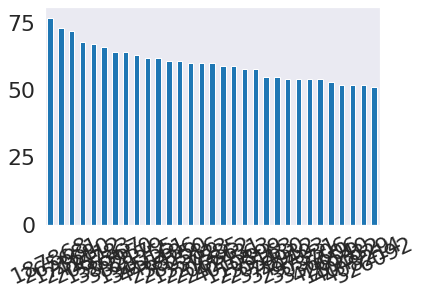

In [ ]:
prevAppCounts[prevAppCounts >50].plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

### Histogram of Number of previous applications for an ID

In [ ]:
sum(appsDF['SK_ID_CURR'].value_counts()==1)

60458

In [ ]:
plt.hist(appsDF['SK_ID_CURR'].value_counts(), cumulative =True, bins = 100);
plt.grid()
plt.ylabel('cumulative number of IDs')
plt.xlabel('Number of previous applications per ID')
plt.title('Histogram of Number of previous applications for an ID')


##### **Can we differentiate applications by low, medium and high previous apps?**
    * Low = <5 claims (22%)
    * Medium = 10 to 39 claims (58%)
    * High = 40 or more claims (20%)

In [ ]:
apps_all = appsDF['SK_ID_CURR'].nunique()
apps_5plus = appsDF['SK_ID_CURR'].value_counts()>=5
apps_40plus = appsDF['SK_ID_CURR'].value_counts()>=40
print('Percentage with 10 or more previous apps:', np.round(100.*(sum(apps_5plus)/apps_all),5))
print('Percentage with 40 or more previous apps:', np.round(100.*(sum(apps_40plus)/apps_all),5))

# Joining secondary tables with the primary table

In the case of the HCDR competition (and many other machine learning problems that involve multiple tables in 3NF or not)  we need to join these datasets (denormalize) when using a machine learning pipeline. Joining the secondary tables with the primary table will lead to lots of new features about each loan application; these features will tend to be aggregate type features or meta data about the loan or its application. How can we do this when using Machine Learning Pipelines?

## Joining `previous_application` with `application_x`
We refer to the `application_train` data (and also `application_test` data also) as the **primary table** and the other files as the **secondary tables** (e.g., `previous_application` dataset). All tables can be joined using the primary key `SK_ID_PREV`.

Let's assume we wish to generate a feature based on previous application attempts. In this case, possible features here could be:

* A simple feature could be the number of previous applications.
* Other summary features of original features such as `AMT_APPLICATION`, `AMT_CREDIT` could be based on average, min, max, median, etc.
 
To build such features, we need to join the `application_train` data (and also `application_test` data also) with the 'previous_application' dataset (and the other available datasets).

When joining this data in the context of pipelines, different strategies come to mind with various tradeoffs:

1. Preprocess each of the non-application data sets, thereby generating many new (derived) features, and then joining (aka merge) the results with the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset) prior to processing the data (in a train, valid, test partition) via your machine learning pipeline. [This approach is recommended for this HCDR competition. WHY?]

* Do the joins as part of the transformation steps. [Not recommended here. WHY?]. How can this be done? Will it work?
  * This would be necessary if we had dataset wide features such as IDF (inverse document frequency) which depend on the entire subset of data as opposed to a single loan application (e.g., a feature about the relative amount applied for such as the percentile of the loan amount being applied for).
 
I want you to think about this section and build on this.

## Roadmap for secondary table processing

1. Transform all the secondary tables to features that can be joined into the main table the application table (labeled and unlabeled)
   * 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 
   * 'previous_application', 'POS_CASH_balance'
* Merge the transformed secondary tables with the primary tables (i.e., the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset)), thereby leading to X_train, y_train, X_valid, etc.
* Proceed with the learning pipeline using X_train, y_train, X_valid, etc.
* Generate a submission file using the learnt model


## agg detour

Aggregate using one or more operations over the specified axis.

For more details see [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html)
```python
DataFrame.agg(func, axis=0, *args, **kwargs**)
```
Aggregate using one or more operations over the specified axis.


In [ ]:
df = pd.DataFrame([[1, 2, 3],
                    [4, 5, 6],
                   [7, 8, 9],
                   [np.nan, np.nan, np.nan]],
                   columns=['A', 'B', 'C'])

In [ ]:
df

In [ ]:
df.agg({'A' : ['sum', 'min'], 'B' : ['min', 'max']})
#        A    B
#max   NaN  8.0
#min   1.0  2.0
#sum  12.0  NaN

,A,B
sum,12.0,NaN
min,1.0,2.0
max,NaN,8.0


In [ ]:
df = pd.DataFrame({'A': [1, 1, 2, 2],
                    'B': [1, 2, 3, 4],
                    'C': np.random.randn(4)})
df

,A,B,C
0,1,1,0.386175
1,1,2,0.224624
2,2,3,-1.645543
3,2,4,-0.597592


In [ ]:
df.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})
#    B             C
#  min max       sum
#A
#1   1   2  0.590716
#2   3   4  0.704907

In [ ]:
appsDF.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [ ]:
funcs = ["a","b","c"]
{f:f"{f}_max" for f in funcs}

{'a': 'a_max', 'b': 'b_max', 'c': 'c_max'}

### Multiple condition expressions in Pandas
So far, both our boolean selections have involved a single condition. You can, of course, have as many conditions as you would like. To do so, you will need to combine your boolean expressions using the three logical operators and, or and not.

Use &, | , ~
Although Python uses the syntax and, or, and not, these will not work when testing multiple conditions with pandas. The details of why are explained [here](https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-39e811c81a0c).

You must use the following operators with pandas:

* & for and
* | for or
* ~ for not

In [ ]:
appsDF[0:50][(appsDF["SK_ID_CURR"]==175704)]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
appsDF[0:50][(appsDF["SK_ID_CURR"]==175704) & ~(appsDF["AMT_CREDIT"]==1.0)]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


## Missing values in prevApps

In [ ]:
appsDF.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [ ]:
appsDF.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

## feature engineering for prevApp table

In [ ]:
agg_op_features = {}

In [ ]:
features = ['AMT_ANNUITY', 'AMT_APPLICATION']
agg_op_features = {}
for f in features: #build agg dictionary
    agg_op_features[f] = {f"{f}_{func}":func for func in ["min", "max", "mean"]}
print(f"{appsDF[features].describe()}")
#print(appsDF.head())
#print(agg_op_features)
result = appsDF.groupby(["SK_ID_CURR"]).agg({'AMT_ANNUITY': ['min', 'max', 'mean'], 'AMT_APPLICATION': ['min','max', 'mean']})
result.columns = result.columns.droplevel() #drop 1 of the header row but keep the feature name header row
result = result.reset_index(level=["SK_ID_CURR"])
result['range_AMT_APPLICATION'] = result['AMT_APPLICATION_max'] - result['AMT_APPLICATION_min']
print(f"result.shape: {result.shape}")
result[0:10]

        AMT_ANNUITY  AMT_APPLICATION
count  1.297979e+06     1.670214e+06
mean   1.595512e+04     1.752339e+05
std    1.478214e+04     2.927798e+05
min    0.000000e+00     0.000000e+00
25%    6.321780e+03     1.872000e+04
50%    1.125000e+04     7.104600e+04
75%    2.065842e+04     1.803600e+05
max    4.180581e+05     6.905160e+06
   SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         

KeyError: ignored

In [ ]:
result.isna().sum()

NameError: ignored

## feature transformer for prevApp table

In [ ]:
# Create aggregate features (via pipeline)
class prevAppsFeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features
        self.agg_op_features = {}
        for f in features:
            self.agg_op_features[f] = {f"{f}_{func}":func for func in ["min", "max", "mean"]}

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        result = X.groupby(["SK_ID_CURR"]).agg(self.agg_op_features)
        result.columns = result.columns.droplevel()
        result = result.reset_index(level=["SK_ID_CURR"])
        result['range_AMT_APPLICATION'] = result['AMT_APPLICATION_max'] - result['AMT_APPLICATION_min']
        return result # return dataframe with the join key "SK_ID_CURR"
    

from sklearn.pipeline import make_pipeline 
def test_driver_prevAppsFeaturesAggregater(df, features):
    print(f"df.shape: {df.shape}\n")
    print(f"df[{features}][0:5]: \n{df[features][0:5]}")
    test_pipeline = make_pipeline(prevAppsFeaturesAggregater(features))
    return(test_pipeline.fit_transform(df))
         
features = ['AMT_ANNUITY', 'AMT_APPLICATION']
features = ['AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CNT_PAYMENT', 
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION']
features = ['AMT_ANNUITY', 'AMT_APPLICATION']
res = test_driver_prevAppsFeaturesAggregater(appsDF, features)
print(f"HELLO")
print(f"Test driver: \n{res[0:10]}")
print(f"input[features][0:10]: \n{appsDF[0:10]}")


# QUESTION, should we lower case df['OCCUPATION_TYPE'] as Sales staff != 'Sales Staff'? (hint: YES)


## Join the labeled dataset

In [ ]:
~3==3

In [ ]:
datasets.keys()

In [ ]:

features = ['AMT_ANNUITY', 'AMT_APPLICATION']
prevApps_feature_pipeline = Pipeline([
        ('prevApps_add_features1', prevApps_add_features1()),  # add some new features 
        ('prevApps_add_features2', prevApps_add_features2()),  # add some new features
        ('prevApps_aggregater', prevAppsFeaturesAggregater()), # Aggregate across old and new features
    ])


X_train= datasets["application_train"] #primary dataset
appsDF = datasets["previous_application"] #prev app


merge_all_data = False

# transform all the secondary tables
# 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 
# 'previous_application', 'POS_CASH_balance'

if merge_all_data:
    prevApps_aggregated = prevApps_feature_pipeline.transform(appsDF)
    
    #'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 
    # 'previous_application', 'POS_CASH_balance'

# merge primary table and secondary tables using features based on meta data and  aggregage stats 
if merge_all_data:
    # 1. Join/Merge in prevApps Data
    X_train = X_train.merge(prevApps_aggregated, how='left', on='SK_ID_CURR')

    # 2. Join/Merge in ...... Data
    #X_train = X_train.merge(...._aggregated, how='left', on="SK_ID_CURR")

    # 3. Join/Merge in .....Data
    #dX_train = X_train.merge(...._aggregated, how='left', on="SK_ID_CURR")

    # 4. Join/Merge in Aggregated ...... Data
    #X_train = X_train.merge(...._aggregated, how='left', on="SK_ID_CURR")

    # ......

## Join the unlabeled dataset (i.e., the submission file)

In [ ]:

X_kaggle_test= datasets["application_test"]
if merge_all_data:
    # 1. Join/Merge in prevApps Data
    X_kaggle_test = X_kaggle_test.merge(prevApps_aggregated, how='left', on='SK_ID_CURR')

    # 2. Join/Merge in ...... Data
    #X_train = X_train.merge(...._aggregated, how='left', on="SK_ID_CURR")

    # 3. Join/Merge in .....Data
    #df_labeled = df_labeled.merge(...._aggregated, how='left', on="SK_ID_CURR")

    # 4. Join/Merge in Aggregated ...... Data
    #df_labeled = df_labeled.merge(...._aggregated, how='left', on="SK_ID_CURR")

    # ......

In [ ]:
# approval rate 'NFLAG_INSURED_ON_APPROVAL'

In [ ]:
# Convert categorical features to numerical approximations (via pipeline)
class ClaimAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None): 
        charlson_idx_dt = {'0': 0, '1-2': 2, '3-4': 4, '5+': 6}
        los_dt = {'1 day': 1, '2 days': 2, '3 days': 3, '4 days': 4, '5 days': 5, '6 days': 6,
          '1- 2 weeks': 11, '2- 4 weeks': 21, '4- 8 weeks': 42, '26+ weeks': 180}
        X['PayDelay'] = X['PayDelay'].apply(lambda x: int(x) if x != '162+' else int(162))
        X['DSFS'] = X['DSFS'].apply(lambda x: None if pd.isnull(x) else int(x[0]) + 1)
        X['CharlsonIndex'] = X['CharlsonIndex'].apply(lambda x: charlson_idx_dt[x])
        X['LengthOfStay'] = X['LengthOfStay'].apply(lambda x: None if pd.isnull(x) else los_dt[x])
        return X
    
    


# Processing pipeline

###  OHE when previously unseen unique values in the test/validation set

Train, validation and Test sets (and the leakage problem we have mentioned previously):

 

Let's look at a small usecase to tell us how to deal with this:

* The OneHotEncoder is fitted to the training set, which means that for each unique value present in the training set, for each feature, a new column is created. Let's say we have 39 columns after the encoding up from 30 (before preprocessing).
* The output is a numpy array (when the option sparse=False is used), which has the disadvantage of losing all the information about the original column names and values.
* When we try to transform the test set, after having fitted the encoder to the training set, we obtain a `ValueError`. This is because the there are new, previously unseen unique values in the test set and the encoder doesn’t know how to handle these values. In order to use both the transformed training and test sets in machine learning algorithms, we need them to have the same number of columns.

This last problem can be solved by using the option handle_unknown='ignore'of the OneHotEncoder, which, as the name suggests, will ignore previously unseen values when transforming the test set.

 

Here is a example that in action:

```python
# Identify the categorical features we wish to consider.
cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

# Notice handle_unknown="ignore" in OHE which ignore values from the validation/test that
# do NOT occur in the training set
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

```


In [ ]:
# # load data
# df = pd.read_csv('chronic_kidney_disease.csv', header="infer")
# # names=['age', ‘bp’, ‘sg’, ‘al’, ‘su’, ‘rbc’, ‘pc’, ‘pcc’, ‘ba’, ‘bgr’, ‘bu’, ‘sc’, ‘sod’, ‘pot’, 
# # ‘hemo’, ‘pcv’, ‘wc’, ‘rc’, ‘htn’, ‘dm’, ‘cad’, ‘appet’, ‘pe’, ‘ane’, ‘class’])
# # head of df
# df.head(10)

In [ ]:
# # Categorical boolean mask
# categorical_feature_mask = df.dtypes==object
# categorical_feature_mask

In [ ]:
# # filter categorical columns using mask and turn it into a list
# categorical_cols = X.columns[categorical_feature_mask].tolist()
# categorical_cols

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# import pandas as pd
# categorical_feature_mask = [True, False]
# # instantiate OneHotEncoder
# enc = OneHotEncoder(categorical_features = categorical_feature_mask,sparse = False, handle_unknown='ignore')
# # categorical_features = boolean mask for categorical columns
# # sparse = False output an array not sparse matrix
# X_train = pd.DataFrame([['small', 1], ['small', 3], ['medium', 3], ['large', 2]])
# X_test = [['small', 1.2],  ['medium', 4], ['EXTRA-large', 2]]
# print(f"X_train:\n{X_train}")
# print(f"enc.fit_transform(X_train):\n{enc.fit_transform(X_train)}")
# print(f"enc.transform(X_test):\n{enc.transform(X_test)}")

# print(f"enc.get_feature_names():\n{enc.get_feature_names()}") 


In [ ]:
# print(f"enc.categories_{enc.categories_}")

# print(f"enc.categories_{enc.categories_}")
# enc.transform([['Female', 1], ['Male', 4]]).toarray()


# enc.inverse_transform([[0, 1, 1, 0, 0], [0, 0, 0, 1, 0]])


# enc.get_feature_names()


### OHE case study: The breast cancer wisconsin dataset (classification)

In [ ]:
# from sklearn.datasets import load_breast_cancer
# data = load_breast_cancer(return_X_y=False)
# X, y = load_breast_cancer(return_X_y=True)
# print(y[[10, 50, 85]])
# #([0, 1, 0])
# list(data.target_names)
# #['malignant', 'benign']
# X.shape

In [ ]:
# data.feature_names

Please [this  blog](https://medium.com/hugo-ferreiras-blog/dealing-with-categorical-features-in-machine-learning-1bb70f07262d) for more details of OHE when the validation/test have previously unseen unique values.

## HCDR preprocessing

In [ ]:
# Split the provided training data into training and validationa and test
# The kaggle evaluation test set has no labels
#
from sklearn.model_selection import train_test_split

use_application_data_ONLY = False #use joined data
if use_application_data_ONLY:
    # just selected a few features for a baseline experiment
    selected_features = ['AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
        'EXT_SOURCE_2','EXT_SOURCE_3','CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
                   'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']
    X_train = datasets["application_train"][selected_features]
    y_train = datasets["application_train"]['TARGET']
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    X_kaggle_test= datasets["application_test"][selected_features]
    # y_test = datasets["application_test"]['TARGET']   #why no  TARGET?!! (hint: kaggle competition)

selected_features = ['AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
        'EXT_SOURCE_2','EXT_SOURCE_3','CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
                   'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']
y_train = X_train['TARGET']
X_train = X_train[selected_features]
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_kaggle_test= X_kaggle_test[selected_features]
# y_test = datasets["application_test"]['TARGET']   #why no  TARGET?!! (hint: kaggle competition)

    
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import re

# Creates the following date features
# But could do so much more with these features
#    E.g., 
#      extract the domain address of the homepage and OneHotEncode it
# 
# ['release_month','release_day','release_year', 'release_dayofweek','release_quarter']
class prep_OCCUPATION_TYPE(BaseEstimator, TransformerMixin):
    def __init__(self, features="OCCUPATION_TYPE"): # no *args or **kargs
        self.features = features
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        df = pd.DataFrame(X, columns=self.features)
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].apply(lambda x: 1. if x in ['Core Staff', 'Accountants', 'Managers', 'Sales Staff', 'Medicine Staff', 'High Skill Tech Staff', 'Realty Agents', 'IT Staff', 'HR Staff'] else 0.)   
        #df.drop(self.features, axis=1, inplace=True)
        return np.array(df.values)  #return a Numpy Array to observe the pipeline protocol
    

from sklearn.pipeline import make_pipeline 
features = ["OCCUPATION_TYPE"]
def test_driver_prep_OCCUPATION_TYPE():
    print(f"X_train.shape: {X_train.shape}\n")
    print(f"X_train['name'][0:5]: \n{X_train[features][0:5]}")
    test_pipeline = make_pipeline(prep_OCCUPATION_TYPE(features))
    return(test_pipeline.fit_transform(X_train))
          
x = test_driver_prep_OCCUPATION_TYPE()
print(f"Test driver: \n{test_driver_prep_OCCUPATION_TYPE()[0:10, :]}")
print(f"X_train['name'][0:10]: \n{X_train[features][0:10]}")


# QUESTION, should we lower case df['OCCUPATION_TYPE'] as Sales staff != 'Sales Staff'? (hint: YES)


In [ ]:
# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [ ]:
# Identify the numeric features we wish to consider. 
num_attribs = [
    'AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
    'EXT_SOURCE_2','EXT_SOURCE_3']

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])
# Identify the categorical features we wish to consider.
cat_attribs = ['CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
               'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']

# Notice handle_unknown="ignore" in OHE which ignore values from the validation/test that
# do NOT occur in the training set
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        #('imputer', SimpleImputer(strategy='most_frequent')),
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

data_prep_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])
              



In [ ]:
list(datasets["application_train"].columns)

In [ ]:
datasets["application_train"] =datasets["application_train"][datasets["application_train"]['NAME_FAMILY_STATUS']!='Unknown']
datasets["application_train"] =datasets["application_train"][datasets["application_train"]['CODE_GENDER']!='XNA']
datasets["application_train"] =datasets["application_train"][datasets["application_train"]['NAME_INCOME_TYPE']!='Maternity leave']

In [ ]:
dfp3_categorical= datasets["application_train"].select_dtypes(include='object')

In [ ]:
dfp3_categorical.describe().T

,count,unique,top,freq
NAME_CONTRACT_TYPE,307500,2,Cash loans,278230
CODE_GENDER,307500,2,F,202443
FLAG_OWN_CAR,307500,2,N,202916
FLAG_OWN_REALTY,307500,2,Y,213302
NAME_TYPE_SUITE,306210,7,Unaccompanied,248520
NAME_INCOME_TYPE,307500,7,Working,158771
NAME_EDUCATION_TYPE,307500,5,Secondary / secondary special,218387
NAME_FAMILY_STATUS,307500,5,Married,196424
NAME_HOUSING_TYPE,307500,6,House / apartment,272859
OCCUPATION_TYPE,211112,18,Laborers,55185


In [ ]:
df_cat = dfp3_categorical

In [ ]:
dfp3_numerical= datasets["application_train"].select_dtypes(exclude='object')
dfp3_numerical['TARGET'] = datasets["application_train"]['TARGET']
df_num = dfp3_numerical

# Feature Engineering

In [39]:
# Common functions used for feature engineering
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")
fe_ds_names = ("fe_bureau","fe_credit_card_balance","fe_installments_payments",
            "fe_previous_application","fe_POS_CASH_balance")

fe_ds = dict()

# List the categorical and Numerical features of a dataset
def listOfNumCatFeatures(df, df_name):
    df_dtypes = df.columns.to_series().groupby(df.dtypes).groups
    numerical_ix = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_ix = df.select_dtypes(include=['object', 'bool']).columns
    #print(f"numerical   features: {list(numerical_ix)}")
    print(f"List of numerical features of dataset  {df_name} :")
    print(list(numerical_ix))
    print(f"List of Categorical features of dataset  {df_name} :")
    print(list(categorical_ix))



## Feature Enginnering for Application dataset
* Add a new column to find if the total income is more than credit amount
* Add a new column to find precentage of credit:total income
* Add a new column to find precentage of annuity:total income
* Add a new column to find the percent of time a person is employed for in life
* Add a new column to find the average income per family member





In [ ]:
listOfNumCatFeatures(datasets['application_train'], 'application_train')

List of numerical features of dataset  application_train :
['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',

In [ ]:
# Feature Engineering - application train
print("The shape of application train data:", datasets['application_train'].shape)
fe_applicationTrainDF = datasets['application_train'].copy()
fe_applicationTrainDF['FLAG_TOTALINCOME_CREDIT'] = fe_applicationTrainDF['AMT_INCOME_TOTAL'] > fe_applicationTrainDF['AMT_CREDIT']
fe_applicationTrainDF['PERCENT_CREDIT_TOTALINCOME'] = fe_applicationTrainDF['AMT_CREDIT'] / fe_applicationTrainDF['AMT_INCOME_TOTAL']
fe_applicationTrainDF['PERCENT_ANNUITY_TOTALINCOME'] = fe_applicationTrainDF['AMT_ANNUITY'] / fe_applicationTrainDF['AMT_INCOME_TOTAL'] 
fe_applicationTrainDF['PERCENT_DAYS_EMPLOYED'] = fe_applicationTrainDF['DAYS_EMPLOYED'] / fe_applicationTrainDF['DAYS_BIRTH']
fe_applicationTrainDF['AVGINCOME_FOR_EACH_MEMBER'] = fe_applicationTrainDF['AMT_INCOME_TOTAL'] / fe_applicationTrainDF['CNT_FAM_MEMBERS']
print("The shape of new application train data:", fe_applicationTrainDF.shape)
fe_applicationTrainDF.head()

The shape of application train data: (307511, 122)
The shape of new application train data: (307511, 127)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,FLAG_TOTALINCOME_CREDIT,PERCENT_CREDIT_TOTALINCOME,PERCENT_ANNUITY_TOTALINCOME,PERCENT_DAYS_EMPLOYED,AVGINCOME_FOR_EACH_MEMBER
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,1.0,False,2.007889,0.121978,0.067329,202500.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,False,4.790750,0.132217,0.070862,135000.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,False,2.000000,0.100000,0.011814,67500.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,False,2.316167,0.219900,0.159905,67500.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,False,4.222222,0.179963,0.152418,121500.0


In [ ]:
# Feature Engineering - application test
print("The shape of application test data:", datasets['application_test'].shape)
fe_applicationTestDF = datasets['application_test'].copy()
fe_applicationTestDF['FLAG_TOTALINCOME_CREDIT'] = fe_applicationTestDF['AMT_INCOME_TOTAL'] > fe_applicationTestDF['AMT_CREDIT']
fe_applicationTestDF['PERCENT_CREDIT_TOTALINCOME'] = fe_applicationTestDF['AMT_CREDIT'] / fe_applicationTestDF['AMT_INCOME_TOTAL']
fe_applicationTestDF['PERCENT_ANNUITY_TOTALINCOME'] = fe_applicationTestDF['AMT_ANNUITY'] / fe_applicationTestDF['AMT_INCOME_TOTAL'] 
fe_applicationTestDF['PERCENT_DAYS_EMPLOYED'] = fe_applicationTestDF['DAYS_EMPLOYED'] / fe_applicationTestDF['DAYS_BIRTH']
fe_applicationTestDF['AVGINCOME_FOR_EACH_MEMBER'] = fe_applicationTestDF['AMT_INCOME_TOTAL'] / fe_applicationTestDF['CNT_FAM_MEMBERS']
print("The shape of new application test data:", fe_applicationTestDF.shape)

The shape of application test data: (48744, 121)
The shape of new application test data: (48744, 126)


## Feature Enginnering for POS_CASH_balance dataset
* OHE the values for NAME_CONTRACT_STATUS column
* Drop columns which are not required such as SK_DPD, SK_DPD_DEF
* Grop by features SK_ID_CURR and SK_ID_PREV

In [22]:
#datasets['POS_CASH_balance'].shape
listOfNumCatFeatures(datasets['POS_CASH_balance'], 'POS_CASH_balance')
#datasets['POS_CASH_balance'].head()

List of numerical features of dataset  POS_CASH_balance :
['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'SK_DPD', 'SK_DPD_DEF']
List of Categorical features of dataset  POS_CASH_balance :
['NAME_CONTRACT_STATUS']


In [23]:
print("The shape of POS_CASH_balance data:", datasets['POS_CASH_balance'].shape)

fe_poscashbalanceDF_temp = datasets['POS_CASH_balance'].copy()
#fe_poscashbalanceDF_temp1 = fe_poscashbalanceDF_temp1.drop(['SK_DPD', 'SK_DPD_DEF', 'MONTHS_BALANCE'], axis =1)

fe_poscashbalanceDF_temp1 = fe_poscashbalanceDF_temp.loc[fe_poscashbalanceDF_temp.groupby(['SK_ID_PREV','SK_ID_CURR'])['MONTHS_BALANCE'].idxmax()]   
#fe_poscashbalanceDF_temp1.head()
fe_poscashbalanceDF_temp1_status = fe_poscashbalanceDF_temp[['SK_ID_PREV','SK_ID_CURR','NAME_CONTRACT_STATUS']]
#print(fe_poscashbalanceDF_temp1.head())

dummiesDF = pd.get_dummies(fe_poscashbalanceDF_temp1_status['NAME_CONTRACT_STATUS'])
#print(dummiesDF.head())

fe_poscashbalanceDF_temp1_status = pd.concat([fe_poscashbalanceDF_temp1_status,dummiesDF] , axis=1, sort=False)
#print(fe_poscashbalanceDF_temp1.head())

features1 = {
    'SK_ID_PREV':['size'],
    'CNT_INSTALMENT_FUTURE':['min'],
    'CNT_INSTALMENT':['max']    
}
aggDF = fe_poscashbalanceDF_temp.groupby(['SK_ID_CURR', 'SK_ID_PREV']).agg(features1)
aggDF.columns = aggDF.columns.droplevel()
aggDF.reset_index(inplace=True)
aggDF.columns=['SK_ID_CURR','SK_ID_PREV','COUNT','REMAINING_REPAYS','INITIAL_TERM']
#print(aggDF.head())
fe_poscashbalanceDF_temp2 = pd.merge(aggDF,fe_poscashbalanceDF_temp1_status,how='left')
#display(fe_poscashbalanceDF_temp2.head())
#fe_poscashbalanceDF_temp2.info()

features2 = {
    'SK_ID_PREV':['size'],
    'REMAINING_REPAYS':['sum'],
    'INITIAL_TERM':  ['min','max'],
    'Active':        ['sum'],
    'Amortized debt':['sum'],
    'Approved':      ['sum'],
    'Canceled':      ['sum'],
    'Completed':     ['sum'],
    'Demand':        ['sum'],
    'Returned to the store':['sum'],
    'Signed':        ['sum'],
    'XNA':        ['sum']
}
fe_poscashbalanceDF = fe_poscashbalanceDF_temp2.groupby('SK_ID_CURR').agg(features2)
fe_poscashbalanceDF.columns = fe_poscashbalanceDF.columns.droplevel()
fe_poscashbalanceDF.reset_index(inplace=True)
fe_poscashbalanceDF.columns=['SK_ID_CURR','COUNT','TOTAL_REMAINING_REPAYS','MIN_INITIAL_TERM','MAX_INITIAL_TERM ','Active','Amortized debt','Approved','Canceled','Completed','Demand','Returned to the store','Signed','XNA']
#fe_poscashbalanceDF.info()
print("The shape of new POS_CASH_balance data:", fe_poscashbalanceDF.shape)
display(fe_poscashbalanceDF.head())
fe_ds['fe_POS_CASH_balance'] = fe_poscashbalanceDF


The shape of POS_CASH_balance data: (10001358, 8)
The shape of new POS_CASH_balance data: (337252, 14)


## Feature Enginnering for bureau_balance dataset
* Find total no of months having late payments


In [27]:
display(datasets['bureau_balance'].shape)
display(datasets['bureau_balance'].head())
listOfNumCatFeatures(datasets['bureau_balance'], 'bureau_balance')

(27299925, 3)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


List of numerical features of dataset  bureau_balance :
['SK_ID_BUREAU', 'MONTHS_BALANCE']
List of Categorical features of dataset  bureau_balance :
['STATUS']


In [30]:
print("The shape of bureau_balance data:", datasets['bureau_balance'].shape)
fe_bureaubalancetempDF = datasets['bureau_balance'].copy()
monthStatusCount = fe_bureaubalancetempDF.groupby('SK_ID_BUREAU').count()['STATUS']
lateMonthStatusCount = fe_bureaubalancetempDF[(fe_bureaubalancetempDF['STATUS'] != '0') & (fe_bureaubalancetempDF['STATUS'] != 'C') & (fe_bureaubalancetempDF['STATUS'] != 'X')].groupby('SK_ID_BUREAU').count()['STATUS']
fe_bureaubalanceDF = pd.merge(left = monthStatusCount, right = lateMonthStatusCount, how = 'left', on = "SK_ID_BUREAU", suffixes = ('_TOTAL', '_LATE'))
fe_bureaubalanceDF.fillna(0, inplace = True)
print("The shape of new bureau_balance data:", fe_bureaubalanceDF.shape)
fe_bureaubalanceDF.head()

The shape of bureau_balance data: (27299925, 3)
The shape of new bureau_balance data: (817395, 2)


## Feature Enginnering for bureau dataset
* Select credit card data
* Count the number of active loan application at the time of application
* Combine bureau dataset with bureau_balance
* Add new columns for finding out late and credit card percent
* Fill NaN values for couple of features


In [31]:
display(datasets['bureau'].shape)
display(datasets['bureau'].head())
listOfNumCatFeatures(datasets['bureau'], 'bureau_balance')

(1716428, 17)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


List of numerical features of dataset  bureau_balance :
['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY']
List of Categorical features of dataset  bureau_balance :
['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']


In [35]:
print("The shape of bureau data:", datasets['bureau'].shape)
fe_bureautempDF = datasets['bureau'].copy()
#1
ccDF = fe_bureautempDF[fe_bureautempDF['CREDIT_TYPE'] == 'Credit card']
ccDF.drop(ccDF.columns.difference(['SK_ID_CURR','CREDIT_TYPE', 'AMT_CREDIT_SUM_DEBT']), 1, inplace=True)
ccDF = ccDF.groupby('SK_ID_CURR').sum()
ccDF.rename({'SK_ID_CURR': 'SK_ID_CURR', 'AMT_CREDIT_SUM_DEBT': 'CREDIT_CARD_DEBT'}, axis = 1, inplace = True)
ccDF.head()
#2
activeCountDF= fe_bureautempDF[fe_bureautempDF['CREDIT_ACTIVE'] == 'Active']
activeCountDF.drop(activeCountDF.columns.difference(['SK_ID_CURR','CREDIT_ACTIVE']), 1, inplace=True)
activeCountDF= activeCountDF.groupby('SK_ID_CURR').count()
activeCountDF.rename({'SK_ID_CURR': 'SK_ID_CURR', 'CREDIT_ACTIVE': 'TOTAL_ACTIVE_LOANS'}, axis = 1, inplace = True)
activeCountDF.head()
fe_bureautempDF.drop(fe_bureautempDF.columns.difference(['SK_ID_CURR','AMT_CREDIT_SUM_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'SK_ID_BUREAU']), 1, inplace=True)

#3
mergedBureauDF = pd.merge(fe_bureautempDF, fe_bureaubalanceDF, 'left','SK_ID_BUREAU')
mergedBureauDF.drop('SK_ID_BUREAU', inplace = True, axis = 1)
mergedBureauDF = mergedBureauDF.groupby('SK_ID_CURR').sum()

#3
fe_bureauDF = pd.merge(mergedBureauDF, activeCountDF, 'left', 'SK_ID_CURR')
fe_bureauDF = pd.merge(fe_bureauDF, ccDF, 'left', 'SK_ID_CURR')

#4
fe_bureauDF['Percent_Late'] = fe_bureauDF['STATUS_LATE']/fe_bureauDF['STATUS_TOTAL']
fe_bureauDF['PERCENT_CREDIT_CARD'] = fe_bureauDF['CREDIT_CARD_DEBT']/fe_bureauDF['AMT_CREDIT_SUM_DEBT']
fe_bureauDF.drop(['STATUS_TOTAL', 'STATUS_LATE', 'CREDIT_CARD_DEBT'], axis = 1, inplace = True)
#4
fe_bureauDF.rename({'AMT_CREDIT_SUM_DEBT': 'TOTAL_DEBT', 'AMT_CREDIT_SUM_OVERDUE': 'TOTAL_DEBT_OVERDUE', 'TOTAL_ACTIVE_LOANS': 'TOTAL_NUMBER_OF_ACTIVE_LOANS', 'Percent_Late': 'PERCENT_LATE'}, axis = 1, inplace = True)
fe_bureauDF.head()

#5
fe_bureauDF['PERCENT_CREDIT_CARD'] = fe_bureauDF['PERCENT_CREDIT_CARD'].fillna(0)
fe_bureauDF['TOTAL_NUMBER_OF_ACTIVE_LOANS'] = fe_bureauDF['TOTAL_NUMBER_OF_ACTIVE_LOANS'].fillna(0)
fe_bureauDF.head()
fe_ds['fe_bureau'] = fe_bureauDF

The shape of bureau data: (1716428, 17)


,TOTAL_DEBT,TOTAL_DEBT_OVERDUE,TOTAL_NUMBER_OF_ACTIVE_LOANS,PERCENT_LATE,PERCENT_CREDIT_CARD
SK_ID_CURR,,,,,
100001,596686.5,0.0,3.0,0.005814,0.0
100002,245781.0,0.0,2.0,0.245455,0.0
100003,0.0,0.0,1.0,NaN,0.0
100004,0.0,0.0,0.0,NaN,0.0
100005,568408.5,0.0,2.0,0.000000,0.0


## Feature Enginnering for previous_application dataset
* Delete columns for which most of the data is missing 
* OHE select features such as 'NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START','NAME_CONTRACT_STATUS'




In [36]:
display(datasets['previous_application'].shape)
display(datasets['previous_application'].head())
listOfNumCatFeatures(datasets['previous_application'], 'previous_application')

(1670214, 37)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


List of numerical features of dataset  previous_application :
['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']
List of Categorical features of dataset  previous_application :
['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']


In [38]:
print("The shape of previous_application data:", datasets['previous_application'].shape)

fe_prevapptempDF = datasets['previous_application'].copy()

#1
fe_prevapptempDF.drop(['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY'],axis=1, inplace=True)

# Create correlation matrix
corr_matrix = fe_prevapptempDF .corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
print("Dropping: ", to_drop)
#1
fe_prevapptemp2DF = fe_prevapptempDF.drop(fe_prevapptempDF[to_drop], axis=1)
fe_prevapptemp2DF.head()

#2
categorical_features = ['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START','NAME_CONTRACT_STATUS']
fe_prevapptempCatDF = fe_prevapptemp2DF[categorical_features ]
imputed = SimpleImputer(fill_value='missing', strategy='constant').fit_transform(fe_prevapptempCatDF) 
ohe = OneHotEncoder().fit(imputed)
catDF = pd.DataFrame(ohe.transform(imputed).toarray(
            ), index=fe_prevapptempCatDF.index, columns=list(ohe.get_feature_names(categorical_features)))

catDF.columns=['CASH_LOANS', 'CONSUMER_LOANS', 'REVOLVING_LOANS', 'XNA', 'FRIDAY', 'MONDAY', 'SATURDAY', 'SUNDAY', 'THURSDAY', 'TUESDAY', 'WEDNESDAY', 'Approved', 'Canceled', 'Refused', 'Unusedoffer']
catDF.head()

fe_prevapptemp2DF= pd.concat([fe_prevapptemp2DF,catDF], axis=1)

features = {
 'CASH_LOANS'     : ['sum'],
 'CONSUMER_LOANS' : ['sum'],
 'REVOLVING_LOANS': ['sum'],
 'XNA'            : ['sum'],
 'FRIDAY'         : ['sum'],
 'MONDAY'         : ['sum'],
 'SATURDAY'       : ['sum'],
 'SUNDAY'         : ['sum'],
 'THURSDAY'       : ['sum'],
 'TUESDAY'        : ['sum'],
 'WEDNESDAY'      : ['sum'],
 'Approved'       : ['sum'],
 'Canceled'       : ['sum'],
 'Refused'        : ['sum'],
 'Unusedoffer'   : ['sum'],
 'SK_ID_PREV'                 : ['size'],
 'AMT_ANNUITY'                : ['min','max','mean'],
 'AMT_APPLICATION'            : ['min','max','mean'],
 'DAYS_DECISION'              : ['min','max','mean'],
}

fe_prevappDF = fe_prevapptemp2DF.groupby(by='SK_ID_CURR').agg(features)
fe_prevappDF.columns = fe_prevappDF.columns.droplevel()
fe_prevappDF.reset_index(inplace=True)
fe_prevappDF.columns= ['SK_ID_CURR','CASH_LOANS', 'CONSUMER_LOANS', 'REVOLVING_LOANS', 'XNA', 'FRIDAY', 'MONDAY', 'SATURDAY', 'SUNDAY', 'THURSDAY', 'TUESDAY', 'WEDNESDAY', 'Approved', 'Canceled', 'Refused', 'Unusedoffer', 'TOTAL_RECORDS', 'AMT_ANNUITY_MIN', 'AMT_ANNUITY_MAX', 'AMT_ANNUITY_MEAN', 'AMT_APPLICATION_MIN', 'AMT_APPLICATION_MAX', 'AMT_APPLICATION_MEAN', 'DAYS_DECISION_MIN', 'DAYS_DECISION_MAX', 'DAYS_DECISION_MEAN']
display(fe_prevappDF.head())
fe_ds['fe_previous_application'] = fe_prevappDF

The shape of previous_application data: (1670214, 37)
Dropping:  ['AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_TERMINATION']


,SK_ID_CURR,CASH_LOANS,CONSUMER_LOANS,REVOLVING_LOANS,XNA,FRIDAY,MONDAY,SATURDAY,SUNDAY,THURSDAY,...,TOTAL_RECORDS,AMT_ANNUITY_MIN,AMT_ANNUITY_MAX,AMT_ANNUITY_MEAN,AMT_APPLICATION_MIN,AMT_APPLICATION_MAX,AMT_APPLICATION_MEAN,DAYS_DECISION_MIN,DAYS_DECISION_MAX,DAYS_DECISION_MEAN
0,100001,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,3951.000,3951.000,3951.000,24835.5,24835.5,24835.50,-1740,-1740,-1740.0
1,100002,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,9251.775,9251.775,9251.775,179055.0,179055.0,179055.00,-606,-606,-606.0
2,100003,1.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,3,6737.310,98356.995,56553.990,68809.5,900000.0,435436.50,-2341,-746,-1305.0
3,100004,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,5357.250,5357.250,5357.250,24282.0,24282.0,24282.00,-815,-815,-815.0
4,100005,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,2,4813.200,4813.200,4813.200,0.0,44617.5,22308.75,-757,-315,-536.0


In [41]:
fe_ds['fe_POS_CASH_balance'] = fe_poscashbalanceDF
fe_ds['fe_previous_application'] = fe_prevappDF
fe_ds['fe_bureau'] = fe_bureauDF
#fe_ds['fe_installments_payments'] = df_ins_out
#fe_ds['fe_credit_card_balance'] = df_credit_out

In [42]:
for i in fe_ds.keys():
    print(i, " shape: ", fe_ds[i].shape)
#Save files into a pickle file
import pickle 
with open('fe_datasets.pickle', 'wb') as f:
    pickle.dump(fe_ds, f, protocol=pickle.HIGHEST_PROTOCOL)
#load datasets from a pickle file
import pickle 
with open('fe_datasets.pickle', 'rb') as f:
    fe_ds = pickle.load(f)


fe_POS_CASH_balance  shape:  (337252, 14)
fe_previous_application  shape:  (338857, 26)
fe_bureau  shape:  (305811, 5)


# Baseline Model

To get a baseline, we will use some of the features after being preprocessed through the pipeline.
The baseline model is a logistic regression model

In [ ]:
def pct(x):
    return round(100*x,3)

In [ ]:
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC"
                                  ])


In [ ]:
%%time 
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("linear", LogisticRegression())
    ])
model = full_pipeline_with_predictor.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import accuracy_score

np.round(accuracy_score(y_train, model.predict(X_train)), 3)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
df_num.drop(columns = ['TARGET'],inplace=True)
df_cols = list(df_num.columns)+ list(df_cat.columns)
df_i = datasets["application_train"][df_cols]

In [ ]:
num_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean'))])

cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])


In [ ]:
data_pipeline = ColumnTransformer([
    ("num_pipeline", num_pipeline, df_num.columns),
    ("cat_pipeline", cat_pipeline, df_cat.columns)], n_jobs = -1)
df_transformed = data_pipeline.fit_transform(df_i)
column_names = list(df_num.columns)  + \
               list(data_pipeline.transformers_[1][1].named_steps["ohe"].get_feature_names(df_cat.columns))

In [ ]:
df_n = pd.DataFrame(df_transformed,  columns=column_names)

In [ ]:
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
models_results = []

In [ ]:
X = df_n.values
y = datasets["application_train"]['TARGET'].values

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
pipe = Pipeline([
('scaler', StandardScaler()),
('classifier', LogisticRegression(solver='lbfgs', max_iter=1000))
])

In [ ]:
pipe.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(max_iter=1000))])

In [ ]:
print('Training set accuracy score: ' + str(pipe.score(X_train,y_train)))
y_pred = pipe.predict(X_valid)
print('Validation set accuracy score: ' + str(accuracy_score(y_valid,y_pred)))
print('Log loss: ',log_loss(y_valid,y_pred))
print('Confusion Matrix: ','\n',confusion_matrix(y_valid, y_pred))
print('ROC_AUC: ',roc_auc_score(y_valid, pipe.predict_proba(X_valid)[:, 1]))

Training set accuracy score: 0.9193419416547106
Validation set accuracy score: 0.9187208672086721
Log loss:  2.807282798507775
Confusion Matrix:  
 [[42322    58]
 [ 3691    54]]
ROC_AUC:  0.7377923183404521


In [ ]:
models_results.append(['Logistic Regression',pipe.score(X_train,y_train),accuracy_score(y_valid,y_pred)])

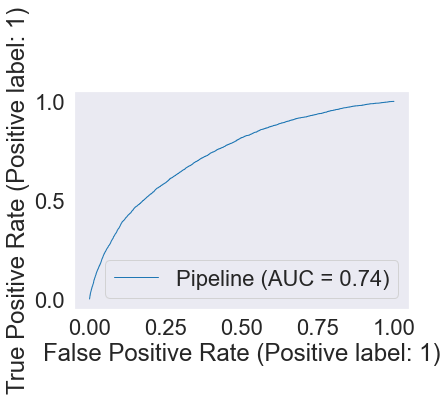

In [ ]:
metrics.plot_roc_curve(pipe, X_valid, y_valid)

In [ ]:
pipe_naive_bayes = Pipeline([
('scaler', StandardScaler()),
('classifier', GaussianNB())
])

In [ ]:
pipe_naive_bayes.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('classifier', GaussianNB())])

In [ ]:
print('Training set accuracy score: ' + str(pipe_naive_bayes.score(X_train,y_train)))
y_pred = pipe_naive_bayes.predict(X_valid)
print('Validation set accuracy score: ' + str(accuracy_score(y_valid,y_pred)))
print('Log loss: ',log_loss(y_valid,y_pred))
print('Confusion Matrix: ','\n',confusion_matrix(y_valid, y_pred))
print('ROC_AUC: ',roc_auc_score(y_valid, pipe_naive_bayes.predict_proba(X_valid)[:, 1]))

Training set accuracy score: 0.132051649928264
Validation set accuracy score: 0.13409214092140923
Log loss:  29.908088220756703
Confusion Matrix:  
 [[ 2560 39820]
 [  120  3625]]
ROC_AUC:  0.5211425931444853


In [ ]:
models_results.append(['Naive Bayes',pipe_naive_bayes.score(X_train,y_train),accuracy_score(y_valid,y_pred)])

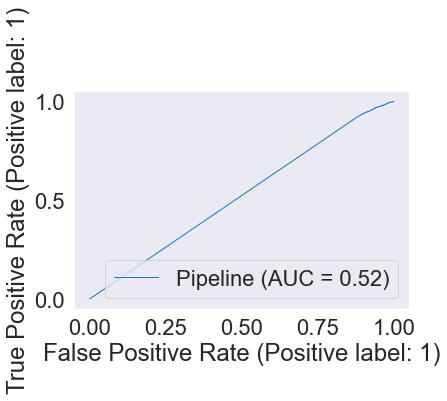

In [ ]:
metrics.plot_roc_curve(pipe_naive_bayes, X_valid, y_valid)

In [ ]:
pipe_rf = Pipeline([
('scaler', StandardScaler()),
('classifier', RandomForestClassifier())
])

In [ ]:
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier())])

In [ ]:
print('Training set accuracy score: ' + str(pipe_rf.score(X_train,y_train)))
y_pred = pipe_rf.predict(X_valid)
print('Validation set accuracy score: ' + str(accuracy_score(y_valid,y_pred)))
print('Log loss: ',log_loss(y_valid,y_pred))
print('Confusion Matrix: ','\n',confusion_matrix(y_valid, y_pred))
print('ROC_AUC: ',roc_auc_score(y_valid, pipe_rf.predict_proba(X_valid)[:, 1]))

Training set accuracy score: 0.9999579148732664
Validation set accuracy score: 0.9188075880758808
Log loss:  2.80428657774608
Confusion Matrix:  
 [[42379     1]
 [ 3744     1]]
ROC_AUC:  0.7077007600506827


In [ ]:
models_results.append(['Random Forest Classifier',pipe_rf.score(X_train,y_train),accuracy_score(y_valid,y_pred)])

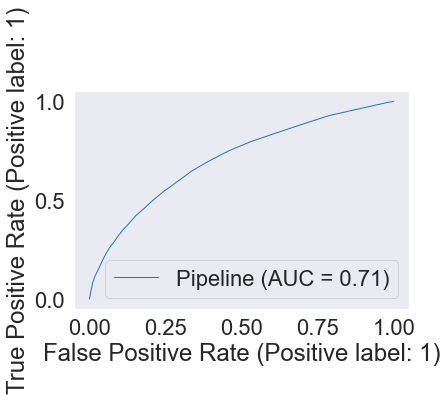

In [ ]:
metrics.plot_roc_curve(pipe_rf, X_valid, y_valid)

In [ ]:
pd.DataFrame(models_results,columns = ['Model Name', 'Training Accuracy', 'Validation Accuracy'])

,Model Name,Training Accuracy,Validation Accuracy
0,Logistic Regression,0.919342,0.918721
1,Naive Bayes,0.132052,0.134092
2,Random Forest Classifier,0.999958,0.918808


![WhatsApp Image 2022-04-12 at 5.09.30 PM.jpeg](attachment:70555f36-73e4-4a8a-8c8e-0fd54d1f474a.jpeg)

In [ ]:
dfp3_categorical_test= datasets["application_test"].select_dtypes(include='object')
df_cat_test = dfp3_categorical_test

In [ ]:
dfp3_numerical_test= datasets["application_test"].select_dtypes(exclude='object')
df_num_test = dfp3_numerical_test


In [ ]:
df_cols_test = list(df_num_test.columns)+ list(df_cat_test.columns)
df_i_test = datasets["application_test"][df_cols_test]


In [ ]:
# data_pipeline = ColumnTransformer([
#     ("num_pipeline", num_pipeline, df_num_test.columns),
#     ("cat_pipeline", cat_pipeline, df_cat_test.columns)], n_jobs = -1)
df_transformed_test = data_pipeline.fit_transform(df_i_test)
column_names_test = list(df_num_test.columns)  + \
                                         list(data_pipeline.transformers_[1][1].named_steps["ohe"].get_feature_names(df_cat_test.columns))

# column_names = list(df_num.columns)  + \
#                list(data_pipeline.transformers_[1][1].named_steps["ohe"].get_feature_names(df_cat.columns))

In [ ]:
df_n_test = pd.DataFrame(df_transformed_test,  columns=column_names_test)

In [ ]:
X_test = df_n_test.values

In [ ]:
# # print('Training set accuracy score: ' + str(pipe.score(X_train,y_train)))
# y_pred_test = pipe.predict(X_test)
# test_class_scores = pipe.predict_proba(X_test)[:, 1]
# # print('Validation set accuracy score: ' + str(accuracy_score(y_valid,y_pred)))
# # print('Log loss: ',log_loss(y_valid,y_pred))
# # print('Confusion Matrix: ','\n',confusion_matrix(y_valid, y_pred))
# # print('ROC_AUC: ',roc_auc_score(y_valid, pipe.predict_proba(X_valid)[:, 1]))

In [ ]:
y_pred_test = pipe_naive_bayes.predict(X_test)
test_class_scores = pipe_naive_bayes.predict_proba(X_test)[:, 1]

In [ ]:
y_pred_test = pipe_rf.predict(X_test)
test_class_scores = pipe_rf.predict_proba(X_test)[:, 1]

In [ ]:
submit_df = datasets["application_test"][['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores

submit_df.head()

,SK_ID_CURR,TARGET
0,100001,0.14
1,100005,0.17
2,100013,0.02
3,100028,0.07
4,100038,0.15


In [ ]:
submit_df.to_csv("submission3.csv",index=False)

In [ ]:
! kaggle competitions submit -c home-credit-default-risk -f submission.csv -m "baseline submission"

Traceback (most recent call last):
  File "/Users/harshitshiroiya/opt/anaconda3/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/Users/harshitshiroiya/opt/anaconda3/lib/python3.8/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/Users/harshitshiroiya/opt/anaconda3/lib/python3.8/site-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /Users/harshitshiroiya/.kaggle. Or use the environment method.


## Evaluation metrics
Submissions are evaluated on [area under the ROC curve](http://en.wikipedia.org/wiki/Receiver_operating_characteristic) between the predicted probability and the observed target.

The SkLearn `roc_auc_score` function computes the area under the receiver operating characteristic (ROC) curve, which is also denoted by AUC or AUROC. By computing the area under the roc curve, the curve information is summarized in one number. 

```python
from sklearn.metrics import roc_auc_score
>>> y_true = np.array([0, 0, 1, 1])
>>> y_scores = np.array([0.1, 0.4, 0.35, 0.8])
>>> roc_auc_score(y_true, y_scores)
0.75
```

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])


In [ ]:
exp_name = f"Baseline_{len(selected_features)}_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)), 
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])],
    4)) 
expLog

## Submission File Prep

For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

```python 
SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2
etc.
```

In [ ]:
test_class_scores = model.predict_proba(X_kaggle_test)[:, 1]

In [ ]:
test_class_scores[0:10]

In [ ]:
# Submission dataframe
submit_df = datasets["application_test"][['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores

submit_df.head()

In [ ]:
submit_df.to_csv("submission.csv",index=False)

# Kaggle submission via the command line API

In [ ]:
! kaggle competitions submit -c home-credit-default-risk -f submission.csv -m "baseline submission"

## report submission

Click on this [link](https://www.kaggle.com/c/home-credit-default-risk/submissions?sortBy=date&group=all&page=1)

![image.png](attachment:image.png)

# Write-up 
For this phase of the project, you will need to submit a write-up summarizing the work you did. 
The write-up form is available on Canvas (Modules-> Module 12.1 - Course Project - Home Credit Default Risk (HCDR)-> FP Phase 2 (HCDR) : write-up form ). It has the following sections: 
## Abstract
Please provide an abstract summarizing the work you did (150 words)

For any financial institution, an important aspect for issuing a loan is to understand if the borrower is capable of repayment given a principal, maturity, and schedule.In this project, we aim to develop a machine learning model which would be based on various characteristics provided to predict a person's behavior and ability to repay.The dataset being used is from “Home Credit Default Risk”. At a high level this dataset consists of application, demographic and historical credit behavior data for various entries.

For phase 1 of this project we understood data by doing basic EDA on all provided datasets, evaluate with baseline pipeline and choosen metrics. During EDA, we intend to watch out for any anomalies, missing and/or irregular data. We plan to do detailed statistical analysis on all provided datasets for numerical, categorical features with visual exploration to come up with the next set of pipelines. Also, to test many machine learning models and then compare and contrast each model to find the unique qualities of each model. And, estimate the best parameters of each model and evaluate.

The Results we got using three various algorithms are:
1. Logistic Regression : 73.4 %
2. Naive Bayes : 52.11%
3. Random Forest : 68.02%


## Introduction
Home Credit is a dataset offered by Home Credit Default Risk, a firm that provides unbanked people with lines of credit (loans). application.csv: This is the primary dataset of home Credit which we are using for both the Training and the Testing purpose by dividing the dataset. This file also comprises information on loans and loan applicants at the time of application. bureau.csv: This file provides information on clients' loan histories from financial institutions that have been reported to the Credit Bureau. Each row in this file has the details about the particular client’s loan. And this file has information about many clients. bureau_balance.csv: In this file the records of monthly balances of early credits of the client tracked by Credit Bureau is available.previous_application.csv: This file provides information on the applicant's prior loan in Home credit, it also contains the information about the parameters which were considered previously while giving the loan before and also the information about the client at the time when the loan was provided to him. POS_CASH_balance.csv: In this file all the details about the client like monthly balances (snapshots) of the applicant's prior point of sales (POS) and also the information about cash loans that client took from Home Credit is available in this file. installments_payments.csv: In this file the information about customers' past payment history for each installments from previous loan taken from the Home Credit which is connected to the loan in our sample is present. credit_card_balance.csv: In this file the information about the monthly balance (snapshots) of clients' past credit card history with Home Credit are contained.


## Feature Engineering and transformers
For this phase we have removed the columns that have more than 90% null values or missing values. To implement this we have used simpleImputer. The rest of the feature engineering will be continued in the next phase.  


## Pipelines
All the columns of application_train dataset were divided into either numerical or categorical values. 
We created seprate pipeline for numerical features and categorical features.
The Null and the missing values in the numerical pipeline were replaced by the mean of that particular column using simpleImputer.
Similarly for categorical Pipeline the null and the missing values were replaced by the most frequent values and unknown values were ignored.
Finally, both the pipelines were merged into a single pipeline
We used metrics such as LogLoss, Accuracy Scopre, Confusion Matrix, ROC_AUC_Score
Splitted the data into 85% train and 15% validation and then implemented Logistic Regression, Naive Bayes and Random Forest.
We used Log Los as the LOS function and calculated the training accuracy, Validation Accuracy, Confusion Matrix and ROC_AUC Curve




## Experimental results
The Results we got using three various algorithms are:
1. Logistic Regression : 73.4 %
2. Naive Bayes : 52.11%
3. Random Forest : 68.02%


## Discussion
The best model that we could get for Phase 0 was Logistic Regression which gave a training accuracy of 91.9% and the Kaggle submission accuracy of 73.4%
Further we are planning to improvise the feature engineering, perform hyperparameter tuning for our models alongside using K-Fold cross validation and GridSearchCV, we might also use some advanced gradient boosting models so that we could get as close to the best accuracy as we can. 


## Conclusion
In this phase we cleaned the data and selected just the characteristics that were relevant to the target variable and prediction. 
We featured the data performing OHE and applied imputing methods to fix the data before feeding it to the model. 
We were able to create the baseline pipeline and could experimentally understand the accuracies of the models like logistic regression, naive bayes and Random forest. Based on the results of the models we saw that there might be underfitting in naive bayes and  overfitting in RandomForest.
The best model that we could get for Phase 0 was Logistic Regression which gave a training accuracy of 91.9% and the Kaggle submission accuracy of 73.4%
Further we are planning to improvise the feature engineering, perform hyperparameter tuning for our models alongside using K-Fold cross validation and GridSearchCV, we might also use some advanced gradient boosting models so that we could get as close to the best accuracy as we can. 
After the aforementioned step we also plan to apply Deep Learning techniques like developing Artificial Neural Networks for better prediction results.

## Kaggle Submission
Please provide a screenshot of your best kaggle submission.   
The screenshot should show the different details of the submission and not just the score.

![Screen%20Shot%202022-04-12%20at%2010.46.10%20PM.png](attachment:Screen%20Shot%202022-04-12%20at%2010.46.10%20PM.png)






![Screen%20Shot%202022-04-12%20at%2010.49.18%20PM.png](attachment:Screen%20Shot%202022-04-12%20at%2010.49.18%20PM.png)

![Screen%20Shot%202022-04-12%20at%2010.38.34%20PM.png](attachment:Screen%20Shot%202022-04-12%20at%2010.38.34%20PM.png)

# References

Some of the material in this notebook has been adopted from [here](https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction/notebook)


1. https://datavizpyr.com/visualizing-missing-data-with-seaborn-heatmap-and-displot/
2. https://www.kaggle.com/c/home-credit-default-risk/data

#  TODO: Predicting Loan Repayment with Automated Feature Engineering in Featuretools

Read the following:
* feature engineering via Featuretools library: 
  * https://github.com/Featuretools/predict-loan-repayment/blob/master/Automated%20Loan%20Repayment.ipynb
* https://www.analyticsvidhya.com/blog/2018/08/guide-automated-feature-engineering-featuretools-python/
* feature engineering paper: https://dai.lids.mit.edu/wp-content/uploads/2017/10/DSAA_DSM_2015.pdf
* https://www.analyticsvidhya.com/blog/2017/08/catboost-automated-categorical-data/